<a href="https://colab.research.google.com/github/gayathri2107/The-Spark-Foundation/blob/main/task1_The_Spark_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Author: Gayathri N**
#**Organisation: The Sparks Foundation**


In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25



Showing the last 10 Rows in the data-set

In [4]:
s_data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
s_data.shape

(25, 2)

*There are 25 Rows and 2 Columns in the data set*

In [6]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
s_data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

*Now, let's plot our data points on 2D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:*

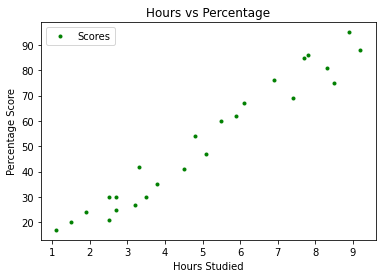

In [9]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='.' , color = 'green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


*From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage score. Hence, greater the number of hours studied , higher the percentage scored.*

## **Preparing the data**

*The next step is to divide the data into attributes (inputs) and labels (outputs).*

In [10]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

*Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:*

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##**Training the Algorithm**

*We have split our data into training and testing sets, and now is finally the time to train our algorithm.*

In [12]:
from sklearn.linear_model import LinearRegression  

l = LinearRegression()  
l.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

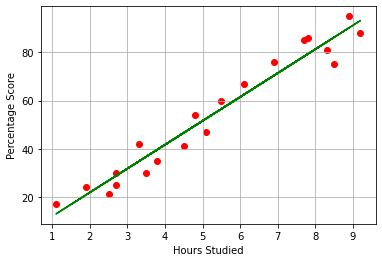

In [14]:
# Plotting the regression line
line = l.coef_*X+l.intercept_

# Plotting for the test data
plt.show()
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()


##**Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
#Predicting the scores
print(X_test)
y_pred = l.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#Comparing actual and predicated values of a dataframes
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[20, 27, 69, 30, 62]","[16.884144762398023, 33.732260779489835, 75.35..."


In [18]:
# You can also test with your own data
hours = 9.25
own_pred = l.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737539


##**Evaluating the model**

*The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.*

In [19]:
from sklearn import metrics  
print('Mean Absolute Error is:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error is: 4.183859899002982
